# **Dependencias**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# **Clases y Funciones**

In [ ]:
def TimeSeriesPlot(data):  
  colors = ['fuchsia', 'blue', 'olive', 'mediumseagreen', 'yellow', 'red', 'darkorange', 'green', 'brown', 'purple', 'darkseagreen', 'gold']
  sns.set_style('whitegrid')
  plt.subplots(figsize = (20, 15))
  for i, line in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    plt.tight_layout(pad = 2)
    data[line].plot(color = colors[i])
    plt.title(line, size = 'xx-large')

def TimeSeriesHist(data):  
  colors = ['fuchsia', 'blue', 'olive', 'mediumseagreen', 'yellow', 'red', 'darkorange', 'green', 'brown', 'purple', 'darkseagreen', 'gold']
  sns.set_style('whitegrid')
  plt.subplots(figsize = (20, 15))
  for i, line in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    plt.tight_layout(pad = 2)
    data[line].hist(density = True, color = colors[i])
    plt.title(line, size = 'xx-large')

# **Datos**

In [ ]:
daily_data = pd.read_csv('Ingresos Metro.csv').drop(columns = 'TIPO_INGRESO')
daily_data['FECHA'] = pd.to_datetime(daily_data['FECHA'], format = '%d/%m/%Y')

**Serie Diaria**

In [ ]:
daily_data = daily_data.groupby(by = 'FECHA', axis = 0).sum()
daily_data = daily_data
daily_data.shape

(3378, 12)

In [ ]:
daily_data_adj = daily_data[365*2+1:]
daily_data_adj.shape

(2647, 12)

In [ ]:
daily_data_adj_2020 = daily_data_adj[:-(365+30*2)]
daily_data_adj_2020.shape

(2222, 12)

**Serie Semanal**

In [ ]:
weekly_data = daily_data.resample('7D', axis = 0).sum().copy()
weekly_data.shape

(483, 12)

In [ ]:
weekly_data_adj = daily_data_adj.resample('7D', axis = 0).sum().copy()
weekly_data_adj.shape

(379, 12)

In [ ]:
weekly_data_adj_2020 = daily_data_adj_2020.resample('7D', axis = 0).sum().copy()
weekly_data_adj_2020.shape

(318, 12)

**Serie Mensual**

In [ ]:
monthly_data = daily_data.resample('M', axis = 0).sum().copy()
monthly_data.shape

(111, 12)

In [ ]:
monthly_data_adj = daily_data_adj.resample('M', axis = 0).sum().copy()
monthly_data_adj.shape

(87, 12)

In [ ]:
monthly_data_adj_2020 = daily_data_adj_2020.resample('M', axis = 0).sum().copy()
monthly_data_adj_2020.shape

(73, 12)

In [ ]:
monthly_data_adj_2020_inputed = monthly_data_adj_2020.copy()
monthly_data_adj_2020_inputed.loc['2017-09-30'] = monthly_data_adj_2020.loc[['2014-09-30', '2015-09-30', '2016-09-30', '2017-09-30']].mean()

**Serie Anual**

In [ ]:
yearly_data = daily_data.resample('Y', axis = 0).sum().sum(axis = 1).copy()

### **Análisis Exploratorio**

## **Serie Diaria**

### *Serie [2012-2021]*

In [ ]:
daily_data.describe()

,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12
count,3378.00,3378.00,3378.00,3378.00,3378.00,3378.00,3378.00,3378.00,3378.00,3378.00,3378.00,3378.00
mean,2374336.13,2694331.15,2264414.31,328518.58,733123.18,508441.64,1118312.28,1365960.62,1000110.42,767322.21,1564451.69,1115146.92
std,824971.83,1002211.44,901779.71,132513.10,270843.52,235117.68,507771.35,509778.26,397702.88,257977.39,568483.72,680399.92
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1935947.12,2111916.50,1670184.00,236381.75,565931.25,327022.50,699433.62,1049786.98,731346.50,586996.23,1275959.48,613448.25
50%,2545642.50,2974670.50,2482320.50,365494.00,790233.50,536605.00,1226677.00,1500373.00,1094827.50,832817.00,1693819.50,999776.50
75%,2980768.70,3415652.50,2922269.42,420867.25,922712.12,670991.75,1502675.25,1731884.50,1289213.00,938578.50,1945545.50,1713588.00
max,8245744.00,9201495.30,7876948.50,1880065.00,2749668.10,2101289.00,3909499.50,5778111.00,3773915.00,2922878.30,6020521.00,2880575.00


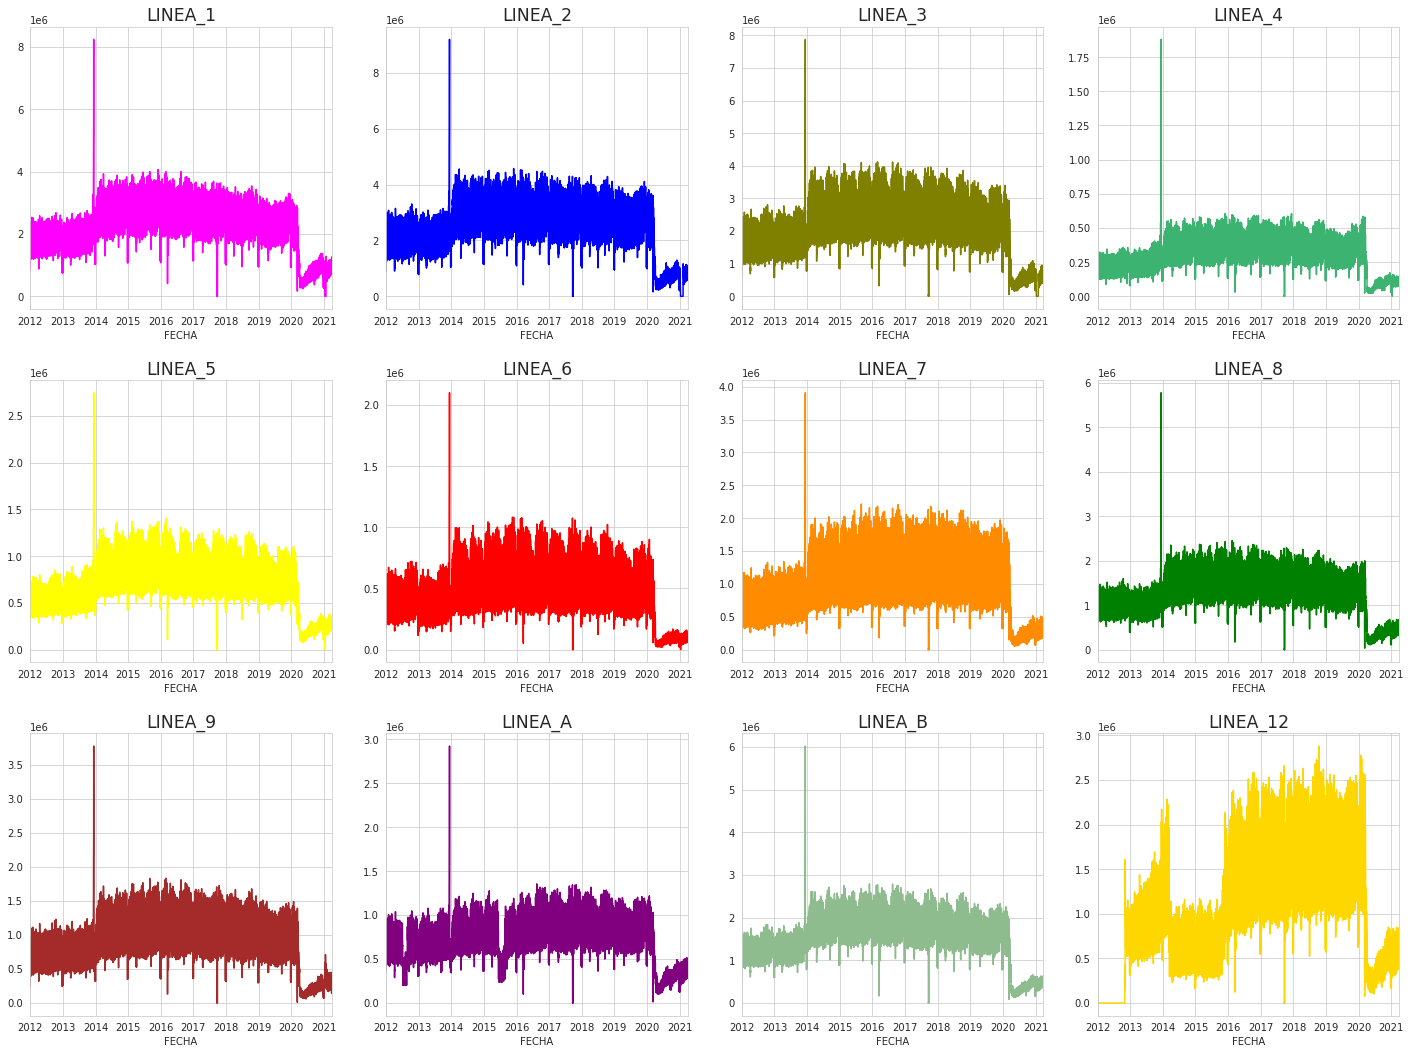

In [ ]:
TimeSeriesPlot(daily_data)

### *Serie Ajustada [2014-2021]*

In [ ]:
daily_data_adj.describe()

,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12
count,2647.00,2647.00,2647.00,2647.00,2647.00,2647.00,2647.00,2647.00,2647.00,2647.00,2647.00,2647.00
mean,2472895.81,2796235.21,2365072.39,348684.18,771505.75,529404.74,1193263.04,1434296.21,1042636.79,784561.83,1636190.50,1269313.09
std,872854.25,1068128.57,955774.22,134400.17,283078.53,249561.34,529227.24,533381.09,421670.69,269283.82,601976.65,636900.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1957815.00,2047137.00,1656186.50,242887.50,592108.50,317936.00,690525.50,1047627.00,701854.50,583848.50,1384390.00,738643.50
50%,2773915.80,3207713.00,2702010.80,395206.00,851602.00,589371.00,1372150.00,1627932.00,1199604.00,867447.30,1820935.00,1302162.00
75%,3060254.90,3501996.20,3007825.00,433184.00,947057.50,696954.50,1551438.50,1777390.00,1324794.30,959189.00,1997658.00,1796358.00
max,4069647.00,4577097.00,4121532.00,606058.00,1405193.00,1083131.00,2216150.00,2452640.00,1831652.00,1354746.00,2790503.00,2880575.00


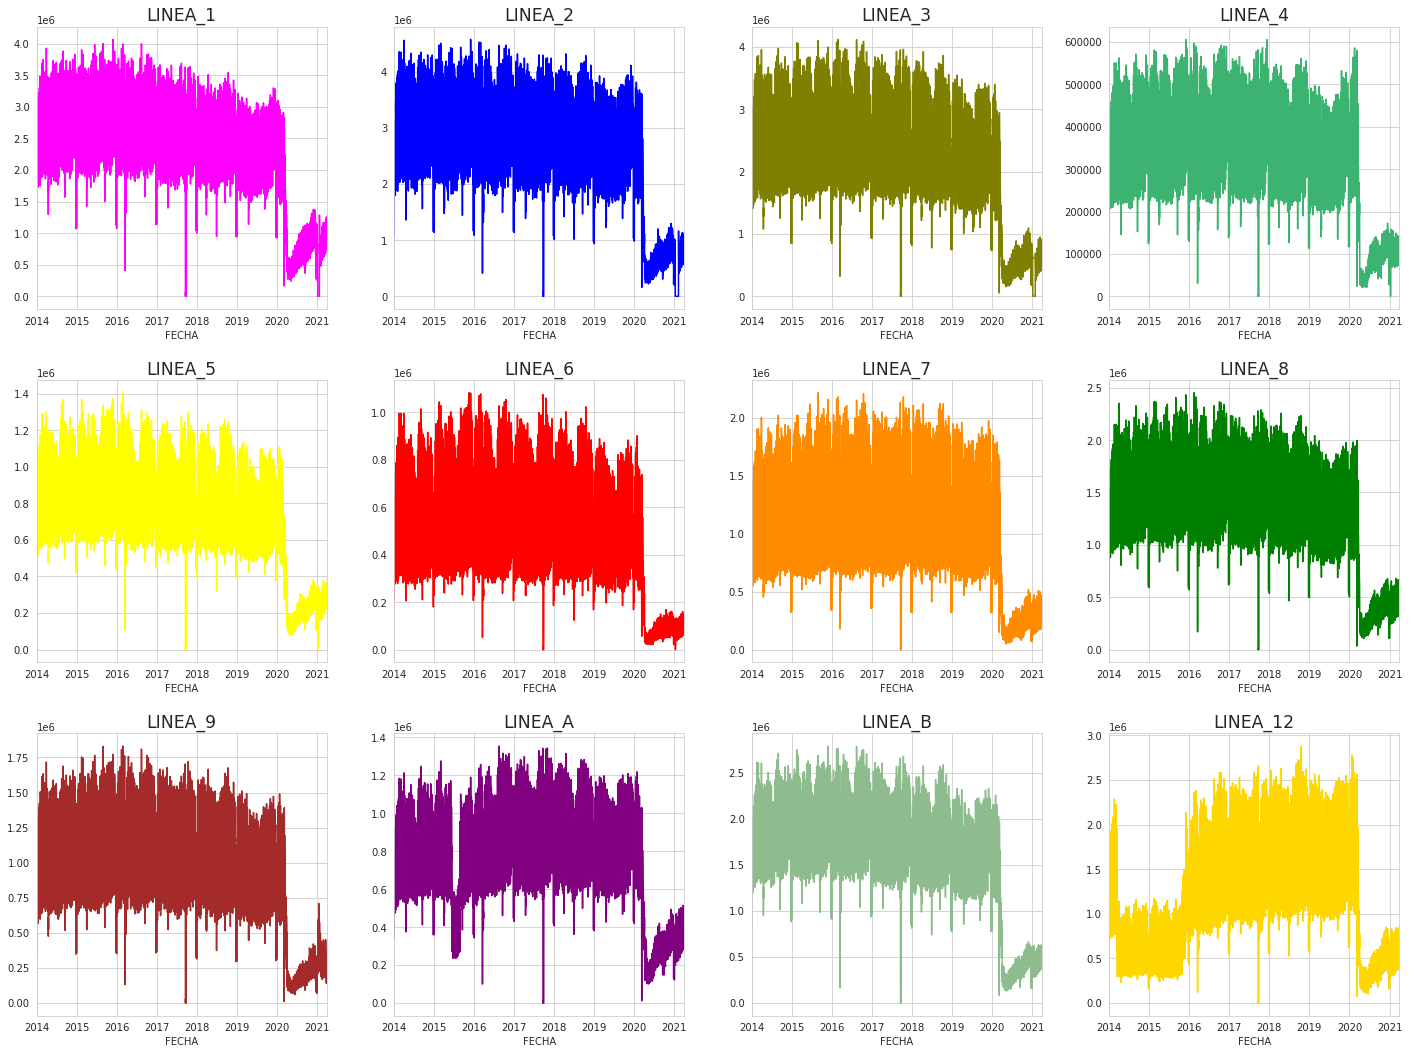

In [ ]:
TimeSeriesPlot(daily_data_adj)

## **Serie Semanal**

### *Serie [2012-2021]*

In [ ]:
weekly_data.describe()

,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12
count,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00
mean,16605605.47,18843583.07,15836835.47,2297589.58,5127308.69,3555933.43,7821239.90,9553240.14,6994561.09,5366489.47,10941444.76,7799102.08
std,4888140.05,5818358.70,5131240.46,753217.22,1574248.38,1243850.51,2733397.97,2930374.82,2233110.09,1440324.81,3453186.05,4221374.18
min,0.00,0.00,0.00,293892.00,943177.00,324376.00,827051.00,1494174.00,769793.00,1212523.00,1537480.00,0.00
25%,14181527.45,16371556.55,13425738.55,1767574.15,4196742.00,3013464.90,6029496.15,7864739.90,5965920.90,4983641.10,9206666.65,4722334.70
50%,18225820.00,21175151.00,17918884.00,2624200.00,5731824.00,3972165.00,9129450.00,10779046.00,7868952.90,5850963.00,12322451.00,7503421.30
75%,20216974.50,22924987.50,19724917.80,2847846.50,6292894.50,4466333.75,9838596.00,11725846.45,8646958.00,6329749.45,13467844.95,11941748.50
max,29162398.60,32214366.40,27089948.30,5398194.00,8930203.10,7017850.30,13430513.10,17662350.50,12487689.00,9735345.60,19555168.00,14701854.00


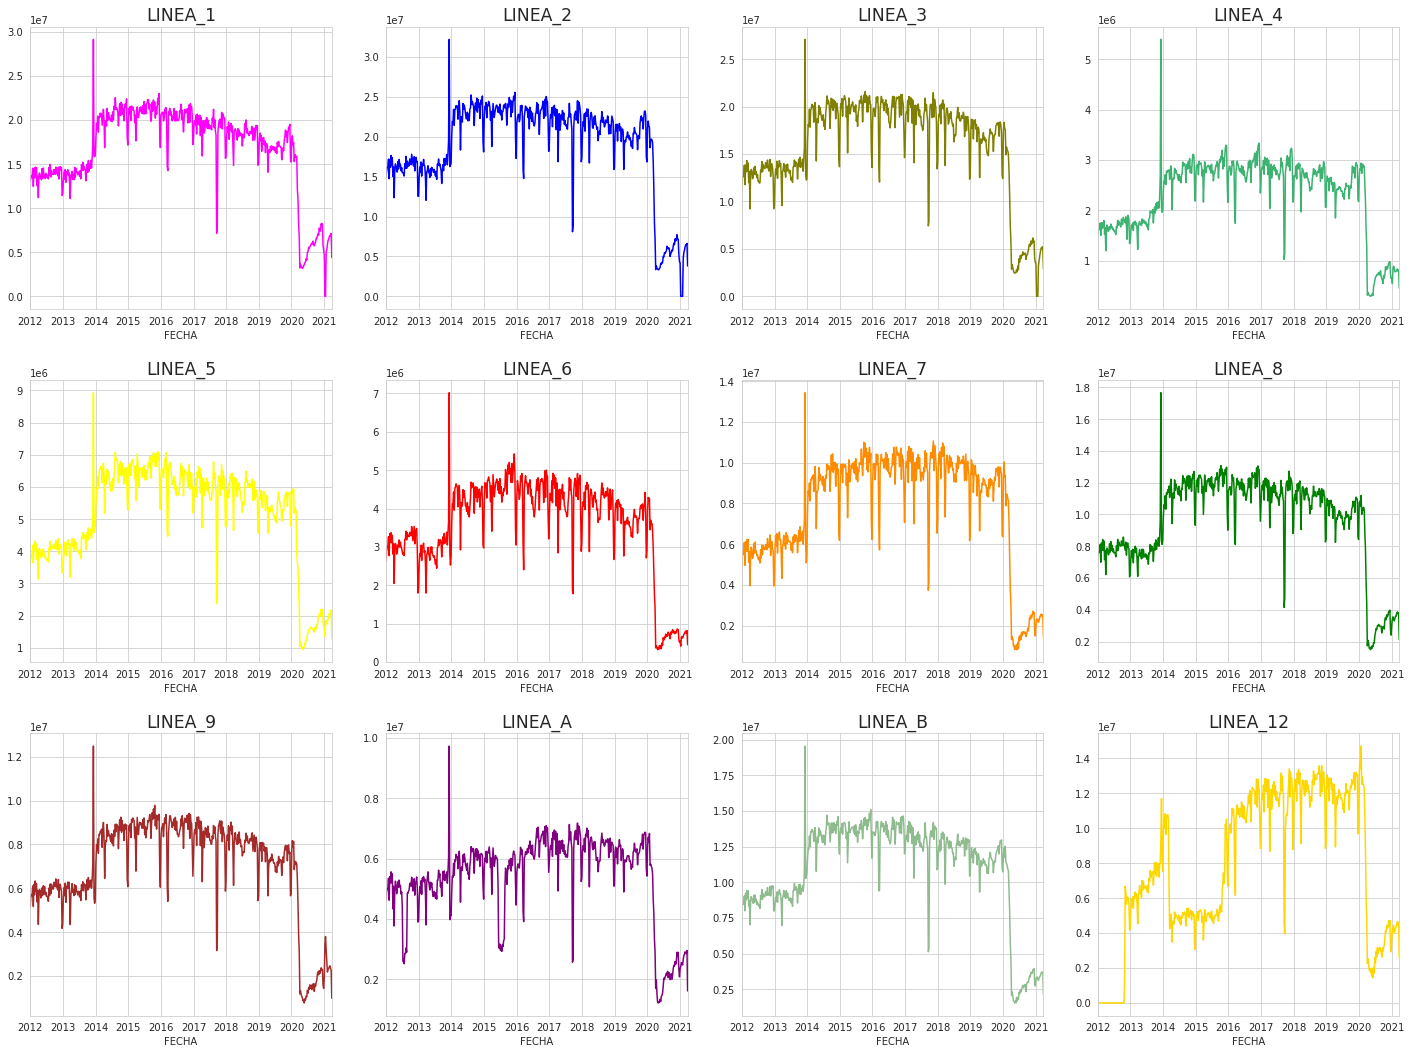

In [ ]:
TimeSeriesPlot(weekly_data)

### *Serie Ajustada [2014-2021]*

In [ ]:
weekly_data_adj.describe()

,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,17271121.94,19529378.92,16518064.96,2435269.20,5388326.44,3697452.08,8333950.55,10017366.95,7281951.38,5479512.28,11427430.72,8865096.97
std,5301294.76,6372151.34,5565066.86,773613.78,1673422.88,1351154.20,2855984.30,3128486.40,2428667.90,1564608.26,3737343.05,3778637.54
min,0.00,0.00,0.00,5119.00,13942.00,8662.00,19321.00,14480.00,28751.00,9954.00,19137.00,12468.00
25%,16927987.20,19817548.00,16295424.00,2445490.50,5388610.00,3672136.50,8580379.65,9968769.00,7249452.50,5520132.75,11542776.50,4947993.50
50%,19125532.70,22009216.00,18763673.00,2728198.00,5980463.60,4203192.00,9494915.00,11209234.00,8224208.20,6077432.20,12838212.00,10708077.50
75%,20594928.85,23163241.00,19944622.50,2872367.50,6381408.50,4528836.00,10016098.50,11872414.00,8769995.56,6439752.50,13639994.00,12120023.50
max,22808657.00,25504817.00,21864632.70,3350247.00,7215339.70,5416457.00,11079927.10,13191501.00,9702361.00,7247684.00,15165114.00,13920591.00


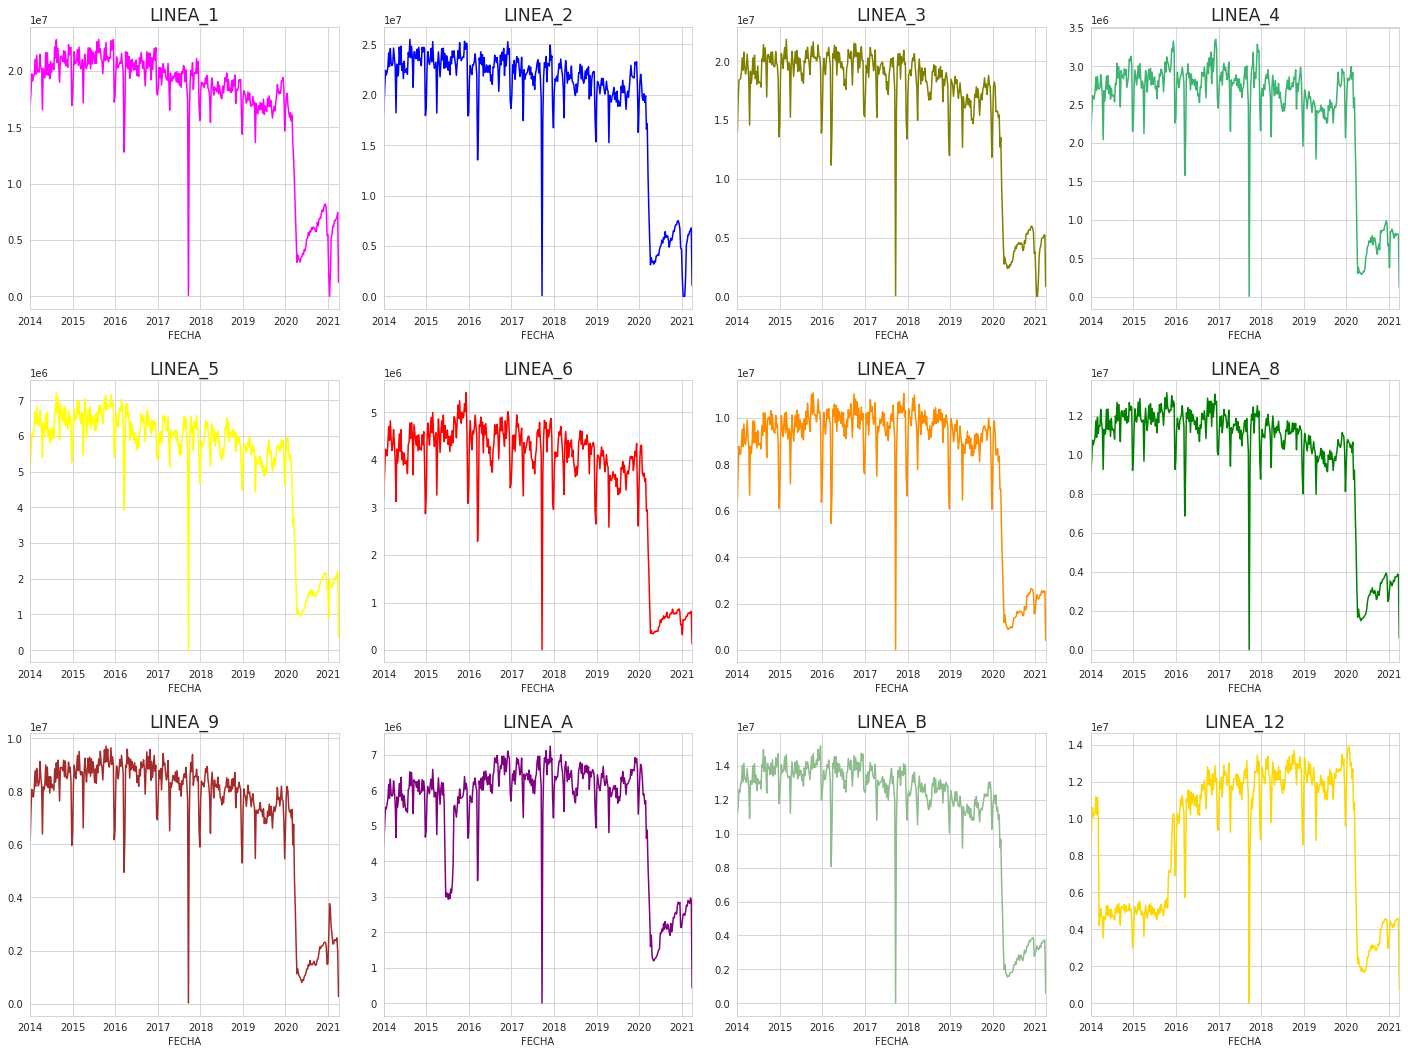

In [ ]:
TimeSeriesPlot(weekly_data_adj)

## **Serie Mensual**

### Serie [2012-2021]

In [ ]:
monthly_data.describe().T[['min', 'mean', 'max']]

,min,mean,max
LINEA_1,11238554.00,72256823.81,97282430.00
LINEA_2,4986802.00,81995050.68,107977414.00
LINEA_3,4092135.00,68911635.43,92857397.00
LINEA_4,1324687.00,9997619.51,13586086.00
LINEA_5,4359239.00,22310721.60,30681419.00
LINEA_6,1611967.00,15473115.72,22232776.00
LINEA_7,4019015.00,34032962.80,47011474.10
LINEA_8,6856249.00,41569504.41,56578459.00
LINEA_9,3941455.00,30435792.85,41939377.00
LINEA_A,5459635.00,23351481.19,30311863.00


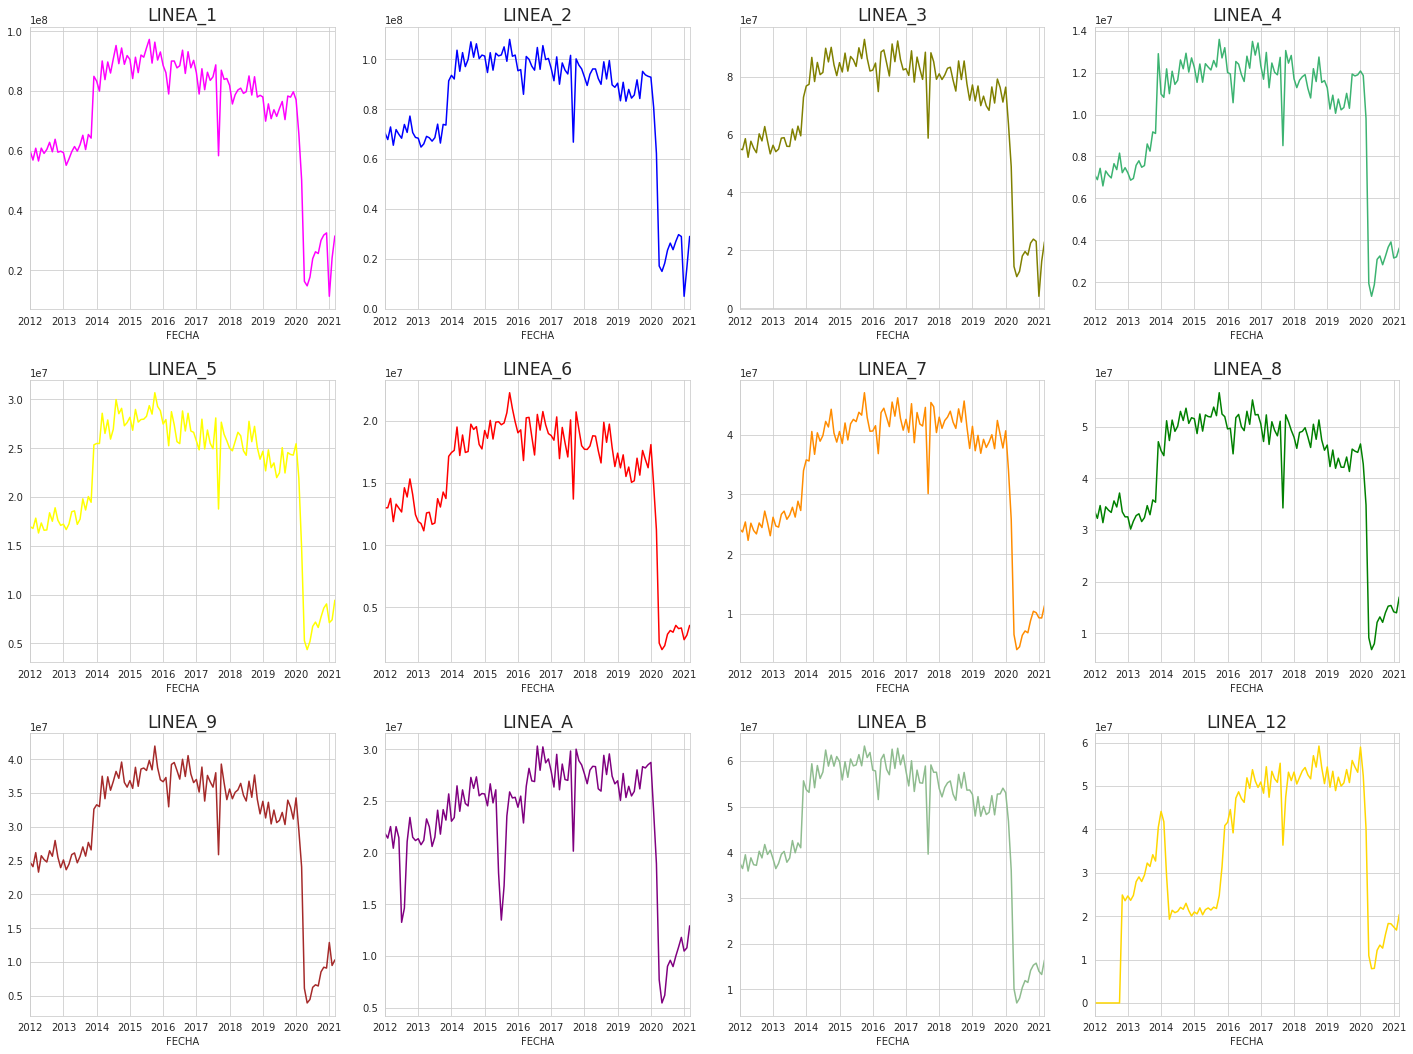

In [ ]:
TimeSeriesPlot(monthly_data)

### *Serie Ajustada [2014-2021]*

In [ ]:
monthly_data_adj.describe().T[['min', 'mean', 'max']]

,min,mean,max
LINEA_1,11238554.00,75238565.70,97282430.00
LINEA_2,4986802.00,85076259.87,107977414.00
LINEA_3,4092135.00,71958007.11,92857397.00
LINEA_4,1324687.00,10608816.40,13586086.00
LINEA_5,4359239.00,23473284.13,30681419.00
LINEA_6,1611967.00,16107291.26,22232776.00
LINEA_7,4019015.00,36305370.79,47011474.10
LINEA_8,6856249.00,43638874.40,56578459.00
LINEA_9,3941455.00,31722523.84,41939377.00
LINEA_A,5459635.00,23870518.99,30311863.00


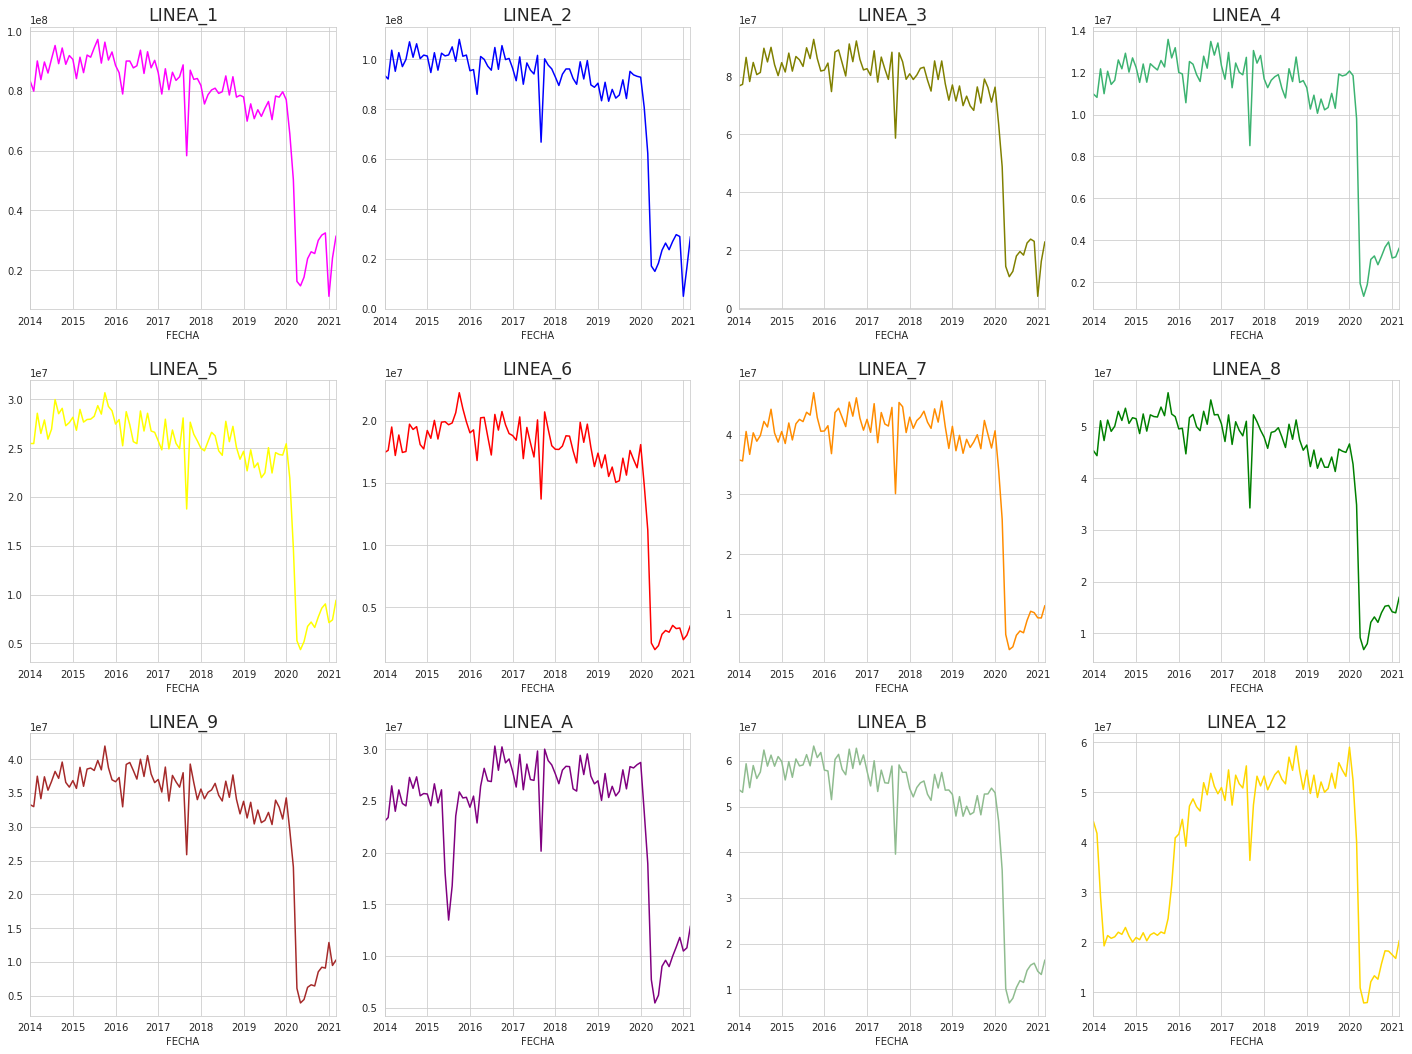

In [ ]:
TimeSeriesPlot(monthly_data_adj)

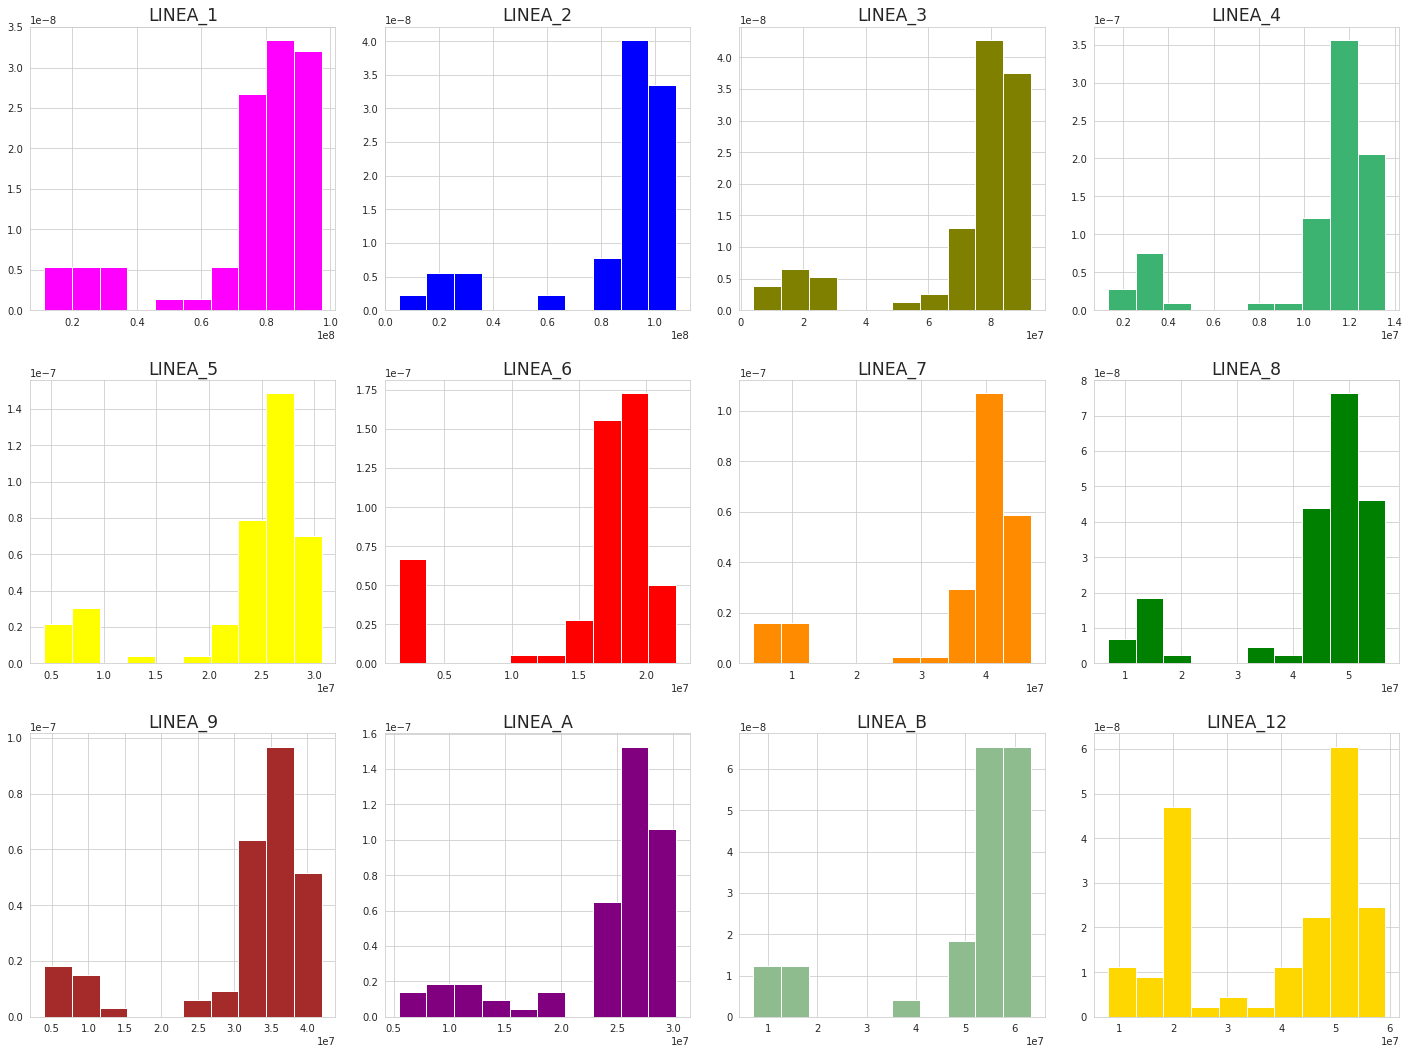

In [ ]:
TimeSeriesHist(monthly_data_adj)

### *Serie Ajustada Final [2014-2020]*

In [ ]:
monthly_data_adj_2020.describe().T[['min', 'mean', 'max']]

,min,mean,max
LINEA_1,58314011.00,84175751.18,97282430.00
LINEA_2,66774685.00,95872833.03,107977414.00
LINEA_3,58727967.00,81388832.91,92857397.00
LINEA_4,8515161.00,11865502.74,13586086.00
LINEA_5,18767975.00,26312967.54,30681419.00
LINEA_6,13696595.00,18378810.08,22232776.00
LINEA_7,30123437.00,41144903.22,47011474.10
LINEA_8,34275321.00,48871448.42,56578459.00
LINEA_9,25867631.00,35794440.83,41939377.00
LINEA_A,13476970.10,26302056.35,30311863.00


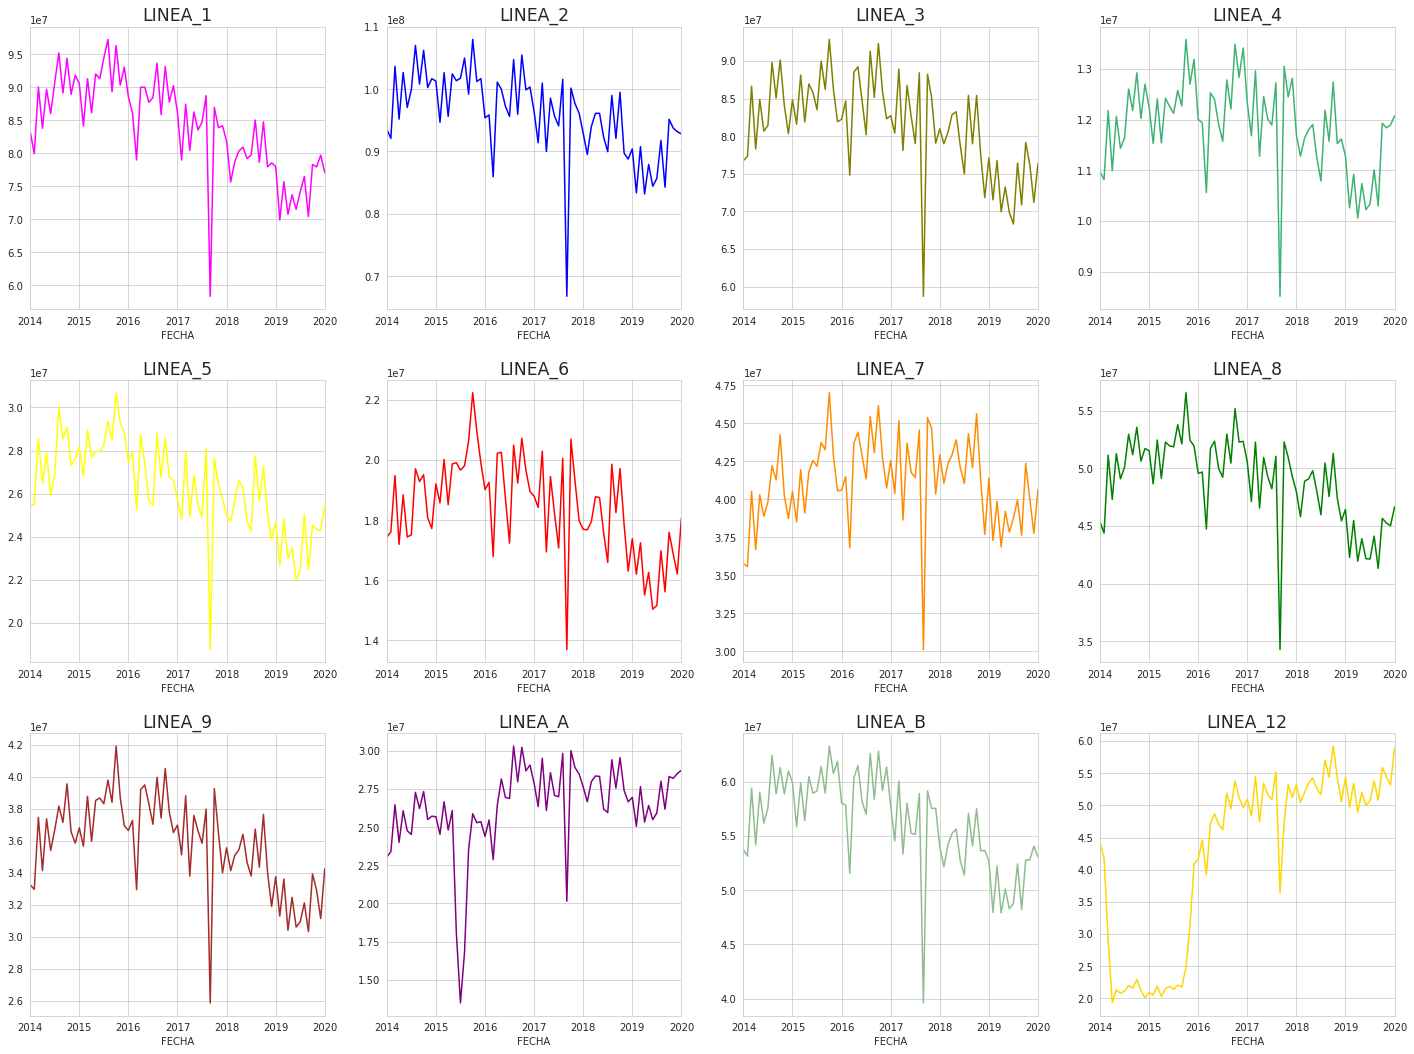

In [ ]:
TimeSeriesPlot(monthly_data_adj_2020)

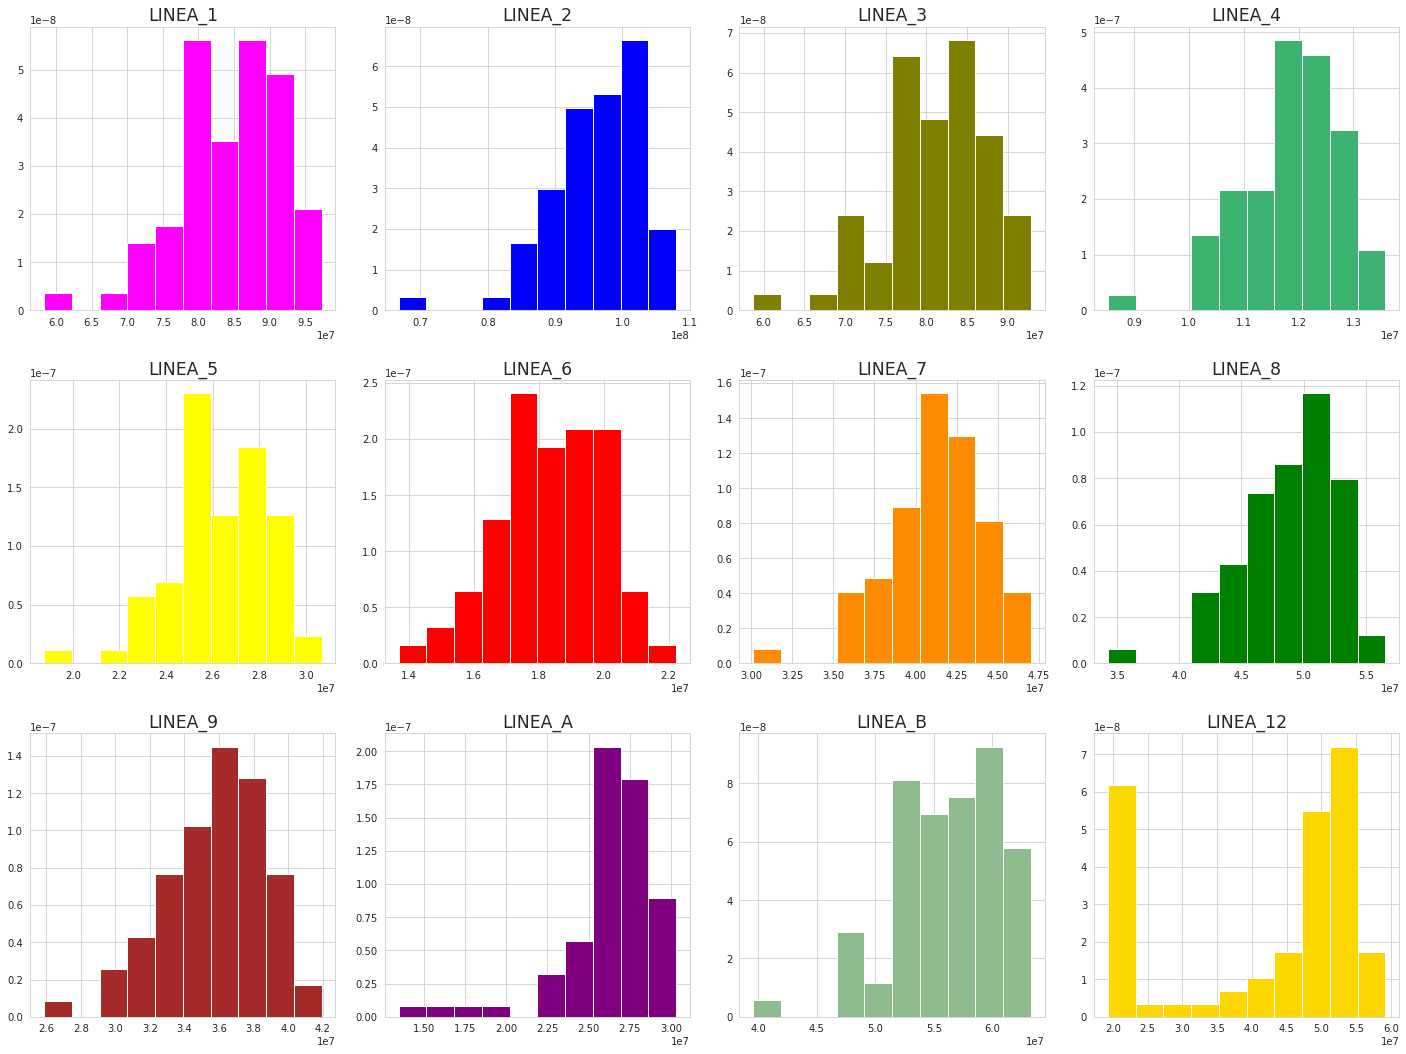

In [ ]:
TimeSeriesHist(monthly_data_adj_2020)

### *Comparación de Sumarios de Series Ajustadas en ambos escenarios*

In [ ]:
monthly_data_adj_2020.describe().T[['min', 'mean', 'max']]-monthly_data_adj.describe().T[['min', 'mean', 'max']]

,min,mean,max
LINEA_1,47075457.00,8937185.48,0.00
LINEA_2,61787883.00,10796573.15,0.00
LINEA_3,54635832.00,9430825.80,0.00
LINEA_4,7190474.00,1256686.34,0.00
LINEA_5,14408736.00,2839683.41,0.00
LINEA_6,12084628.00,2271518.82,0.00
LINEA_7,26104422.00,4839532.43,0.00
LINEA_8,27419072.00,5232574.02,0.00
LINEA_9,21926176.00,4071916.98,0.00
LINEA_A,8017335.10,2431537.35,0.00


### *Serie de Totales Ajustada [2014-2021]*

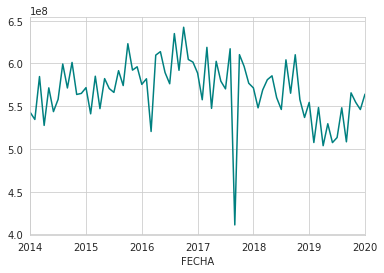

In [ ]:
monthly_data_adj_2020.sum(axis = 1).plot(color = 'teal')

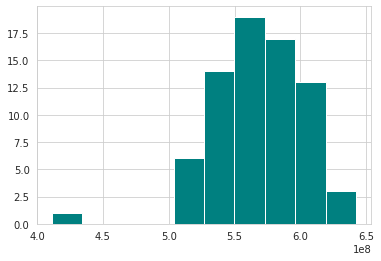

In [ ]:
monthly_data_adj_2020.sum(axis = 1).hist(color = 'teal')

In [ ]:
monthly_data_adj_2020.sum(axis = 1).describe().T[['min', 'mean', 'max']]

min    411177702.00
mean   568677284.42
max    642396958.50
dtype: float64

# **Predicciones**

## Datos

In [ ]:
comp_data = pd.read_csv('Comparacion.csv')
comp_data['Fecha'] = comp_data['anio'].astype(str) +'/'+ comp_data['mes'].astype(str)
comp_data = comp_data[['Fecha', 
                       'Total', 
                       'Prediccion', 
                       'Banda_inferior', 
                       'Banda_superior']].rename(columns = {'Total': 'Ingresos Observados', 'Prediccion': 'Ingresos Estimados'})
comp_data['Fecha'] = pd.to_datetime(comp_data['Fecha'], format = '%Y/%m')
comp_data = comp_data.set_index('Fecha')
comp_data.head()

,Ingresos Observados,Ingresos Estimados,Banda_inferior,Banda_superior
Fecha,,,,
2020-02-01,469656540,520901828.64,492416526.92,596926096.68
2020-03-01,376992013,557264900.84,526209054.67,557759184.22
2020-04-01,107717472,529070248.34,498949265.51,595110917.89
2020-05-01,83082392,546683982.22,514924087.10,572726811.16
2020-06-01,96811907,546300358.42,514026785.76,581719194.59


## Comparación de Escenarios

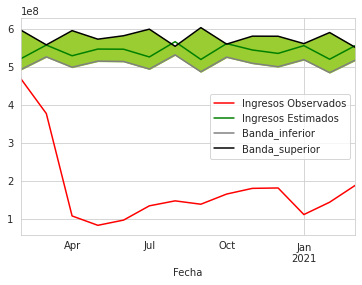

In [ ]:
plot = comp_data[['Ingresos Observados', 'Ingresos Estimados', 'Banda_inferior', 'Banda_superior']].plot(color = ['red', 
                                                                                                                    'green',
                                                                                                                    'gray',
                                                                                                                    'black'])
plot.fill_between(x = comp_data.index, 
                  y1 = comp_data['Banda_inferior'], 
                  y2 = comp_data['Banda_superior'], 
                  color = 'yellowgreen')

## Diferencia entre los Escenarios

In [ ]:
comp_data['Diferencia BandSup-Obs'] = comp_data['Banda_superior'].values - comp_data['Ingresos Observados'].values 
comp_data['Diferencia Est-Obs'] = comp_data['Ingresos Estimados'].values - comp_data['Ingresos Observados'].values
comp_data['Diferencia BandInf-Obs'] = comp_data['Banda_inferior'].values - comp_data['Ingresos Observados'].values  

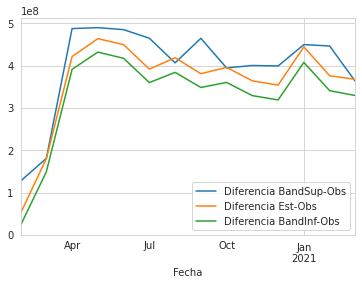

In [ ]:
comp_data[['Diferencia BandSup-Obs', 'Diferencia Est-Obs', 'Diferencia BandInf-Obs']].plot()

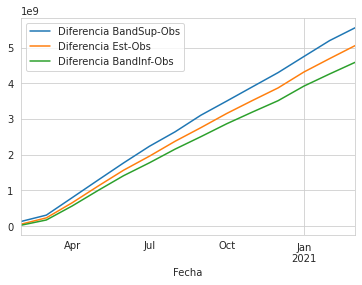

In [ ]:
comp_data[['Diferencia BandSup-Obs', 'Diferencia Est-Obs', 'Diferencia BandInf-Obs']].cumsum().plot()

In [ ]:
comp_data[['Diferencia BandSup-Obs', 'Diferencia Est-Obs', 'Diferencia BandInf-Obs']].sum()

Diferencia BandSup-Obs   5558028977.94
Diferencia Est-Obs       5058697248.86
Diferencia BandInf-Obs   4590361567.75
dtype: float64

In [ ]:
yearly_data

FECHA
2012-12-31   4463971819.97
2013-12-31   4968039307.77
2014-12-31   6763679176.35
2015-12-31   6941626497.21
2016-12-31   7143216975.34
2017-12-31   6877181523.90
2018-12-31   6835859192.00
2019-12-31   6387723572.00
2020-12-31   2663881014.00
2021-12-31    443657633.00
Freq: A-DEC, dtype: float64

In [ ]:
comp_data[['Diferencia BandSup-Obs', 'Diferencia Est-Obs', 'Diferencia BandInf-Obs']].sum()/comp_data['Ingresos Estimados'].sum()

Diferencia BandSup-Obs   0.73
Diferencia Est-Obs       0.67
Diferencia BandInf-Obs   0.61
dtype: float64

In [ ]:
comp_data[['Diferencia BandSup-Obs', 'Diferencia Est-Obs', 'Diferencia BandInf-Obs']].sum()/comp_data['Ingresos Estimados'].sum()*365

Diferencia BandSup-Obs   267.50
Diferencia Est-Obs       243.47
Diferencia BandInf-Obs   220.93
dtype: float64